# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

Google reviews however have to scroll down when the drive opens to bottom and then run the code

In [193]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [194]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# specify the url of the business page on Google
url = 'https://www.google.com/maps/place/Shawarma+Joint/@40.110194,-88.2292969,17z/data=!4m8!3m7!1s0x880cd75a94f06a39:0x384e21b7611f191e!8m2!3d40.110194!4d-88.2292969!9m1!1b1!16s%2Fg%2F11nf1gt8nh?hl=en&hl=en&entry=ttu'

reviews_list = []

# create an instance of the Chrome driver
driver = webdriver.Chrome()

# navigate to the specified url
driver.get(url)



In [195]:
elements = WebDriverWait(driver, 20).until(EC.visibility_of_all_elements_located((By.XPATH, "//button[@class='w8nwRe kyuRq']")))
for elem in elements:
    elem.click()


In [196]:
wait = WebDriverWait(driver, 20) # increased the waiting time
review_elements = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'wiI7pd')))

        
# extract the text of each review
for element in review_elements:
    reviews_list.append(element.text) 

df_google = pd.DataFrame(reviews_list)

# close the browser
driver.quit()

In [198]:
#df.to_csv("googlereviews.csv")
df_google.columns = ['reviews']
print(df_google.to_string())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            reviews
0                                                                                                                   

In [217]:
df_google


,level_0,index,reviews
0,0,0,I have been to the University of Illinois thre...
1,1,1,I ordered the “make your own wrap” with spicy ...
2,2,2,"Hello Alex Soja, We’re so grateful that you to..."
3,3,3,The best Mediterranean restaurant at the U of ...
4,4,4,"Thank you for your review, we appreciate it!"
...,...,...,...
285,285,311,soso
286,286,312,"Thank you for the positive rating, we certainl..."
287,287,313,"Hi, we appreciate your business, and for the f..."
288,288,315,"Thank you for the positive rating, we certainl..."


In [181]:
df_google['reviews'] = df_google['reviews'].str.lower()
rem = 'thank you for your review'
rem_index = df_google.index[df_google['reviews'].str.contains(rem, na=False)]
for i in rem_index:
    df_google = df_google.drop(labels=i, axis=0)

df_google_clean = df_google.reset_index(drop=True)

df_google_clean




,reviews
0,i have been to the university of illinois thre...
1,i ordered the “make your own wrap” with spicy ...
2,"hello alex soja, we’re so grateful that you to..."
3,the best mediterranean restaurant at the u of ...
4,the best restaurant in town! i’m here for work...
...,...
276,the lunch special has a large portion and the ...
277,a nice restaurant for shawarma sandwiches in u...
278,soso
279,"thank you for the positive rating, we certainl..."


In [191]:
rem2 = 'thank you'


print(rem_index = df_google.index[df_google_clean['reviews'].str.contains(rem, na=False)])

df_google_clean = df_google_clean[~df_google_clean['reviews'].str.contains(rem2, na=False)]

df_google_clean = df_google_clean.reset_index(drop=True)

df_google

,reviews
0,i have been to the university of illinois thre...
1,i ordered the “make your own wrap” with spicy ...
2,"hello alex soja, we’re so grateful that you to..."
3,the best mediterranean restaurant at the u of ...
4,the best restaurant in town! i’m here for work...
...,...
262,nice and friendly service and the food is amaz...
263,the lunch special has a large portion and the ...
264,a nice restaurant for shawarma sandwiches in u...
265,soso


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [103]:
df_google['reviews'] = df_google['reviews'].str.lower()
df_google['reviews'] = df_google['reviews'].str.replace(" Hi, we appreciate your business, and for the five star rating.", "").str.replace("Not Verified |", "").str.replace("flight", "").str.replace("ba", "").str.replace("british airways", "").str.replace("us", "").str.replace("london", "").str.replace("would", "")
df_google1 = df_google


In [104]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')  # Download punkt tokenizer

# Manually set stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Assuming df is your DataFrame

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()

    # Check for NaN values
    if pd.isna(text):
        return []

    tokens = word_tokenize(str(text).lower())  # Convert to string to handle NaN
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

    return tokens

df_google['processed text'] = df_google['reviews'].apply(lambda x: preprocess_text(x))

# Filter out rows with empty 'processed text'
df = df_google[df_google['processed text'].apply(lambda x: len(x) > 0)]

dictionary = corpora.Dictionary(df['processed text'])
corpus = [dictionary.doc2bow(doc) for doc in df['processed text']]

lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/srikarpoladi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(0, '0.047*"food" + 0.017*"good" + 0.016*"great" + 0.014*"amazing" + 0.013*"place"')
(1, '0.031*"food" + 0.024*"great" + 0.020*"chicken" + 0.016*"shawarma" + 0.014*"bowl"')
(2, '0.027*"appreciate" + 0.026*"thank" + 0.026*"review" + 0.021*"food" + 0.017*"really"')


In [ ]:
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Assuming df is your DataFrame with a 'review' column
# If not, replace 'review' with the actual column name containing reviews

# Create SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'review' column
df1['sentiment_scores'] = df1['reviews'].apply(lambda x: sia.polarity_scores(x))

# Interpret the sentiment scores and create a 'sentiment' column
df1['sentiment'] = df1['sentiment_scores'].apply(lambda scores: 'Positive' if scores['compound'] >= 0.05 else ('Negative' if scores['compound'] <= -0.05 else 'Neutral'))

# Display the DataFrame with sentiment analysis results
df1


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/srikarpoladi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews,processed text,sentiment_scores,sentiment
0,not a great experience. i could not check in ...,"[great, experience, could, check, online, two,...","{'neg': 0.062, 'neu': 0.807, 'pos': 0.131, 'co...",Positive
1,i was excited to fly as i'd not travelled wi...,"[excited, fly, travelled, long, haul, travelle...","{'neg': 0.068, 'neu': 0.839, 'pos': 0.094, 'co...",Positive
2,i jt want to warn everyone of the worst ctom...,"[jt, want, warn, everyone, worst, ctomer, serv...","{'neg': 0.065, 'neu': 0.889, 'pos': 0.046, 'co...",Negative
3,paid for biness class travelling cairo to he...,"[paid, biness, class, travelling, cairo, heath...","{'neg': 0.182, 'neu': 0.736, 'pos': 0.082, 'co...",Negative
4,the plane was extremely dirty with chocolate...,"[plane, extremely, dirty, chocolate, smudged, ...","{'neg': 0.12, 'neu': 0.834, 'pos': 0.046, 'com...",Negative
...,...,...,...,...
3733,this was a bmi regional operated on a rj145 f...,"[bmi, regional, operated, manchester, heathrow...","{'neg': 0.097, 'neu': 0.831, 'pos': 0.072, 'co...",Negative
3734,lhr to ham. purser addresses all club passenge...,"[lhr, ham, purser, addresses, club, passengers...","{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'comp...",Positive
3735,my son who had worked for urged me to fly to...,"[son, worked, urged, fly, kansas, city, recomm...","{'neg': 0.04, 'neu': 0.887, 'pos': 0.073, 'com...",Positive
3736,city-new york jfk via shannon on a318 but had...,"[york, jfk, via, shannon, really, nice, seats,...","{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...",Positive


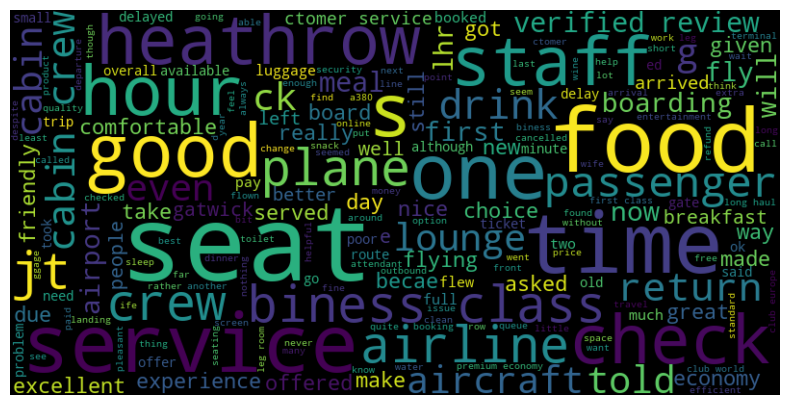

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ""

for review in df['reviews']:
    text += str(review) + ' '  # Ensure a space between reviews


# Generate WordCloud
cloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()





2246
1434
48


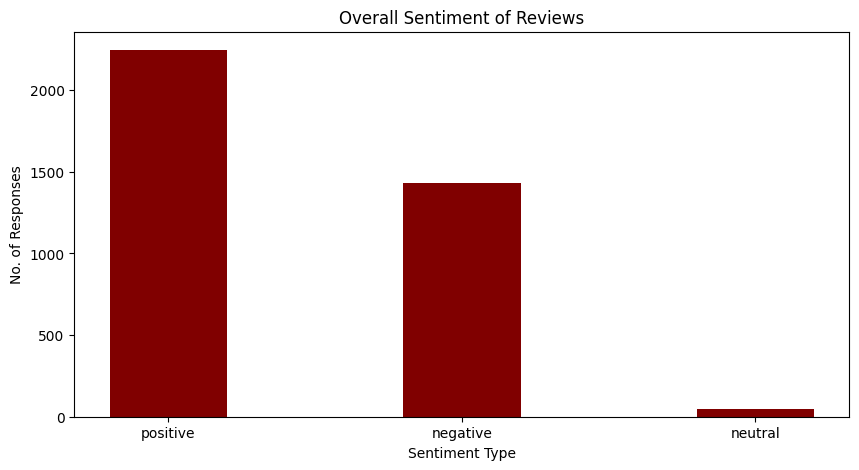

In [ ]:
import numpy as np

print(len(df1[df1['sentiment'] == 'Positive']))
print(len(df1[df1['sentiment'] == 'Negative']))
print(len(df1[df1['sentiment'] == 'Neutral']))


bar = {'positive': len(df1[df1['sentiment'] == 'Positive']), 'negative': len(df1[df1['sentiment'] == 'Negative']), 'neutral' : len(df1[df1['sentiment'] == 'Neutral'])}
courses = list(bar.keys())
values = list(bar.values())

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(courses, values, color='maroon', width=0.4)

# Labeling and title
ax.set_xlabel("Sentiment Type")
ax.set_ylabel("No. of Responses")
ax.set_title("Overall Sentiment of Reviews")

plt.show()




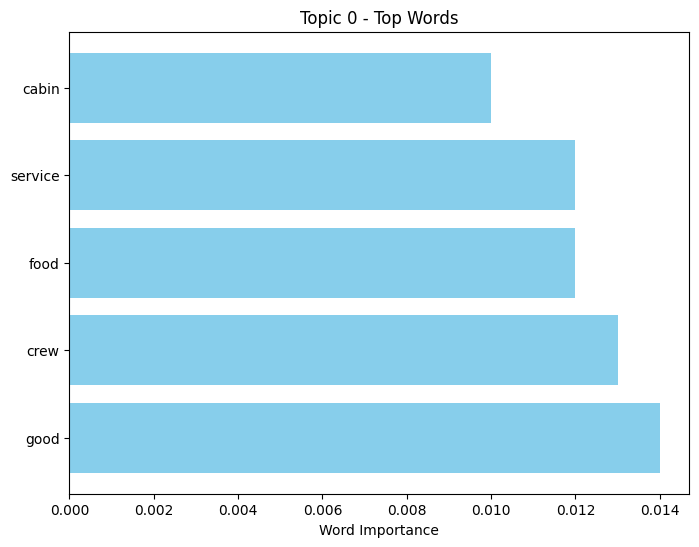

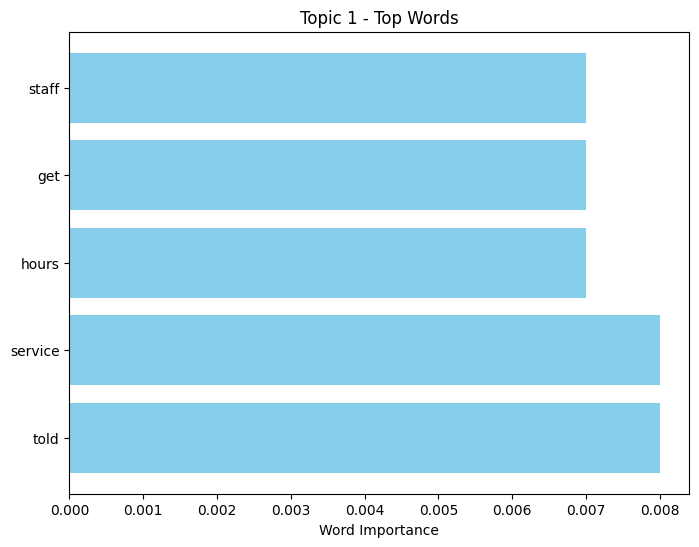

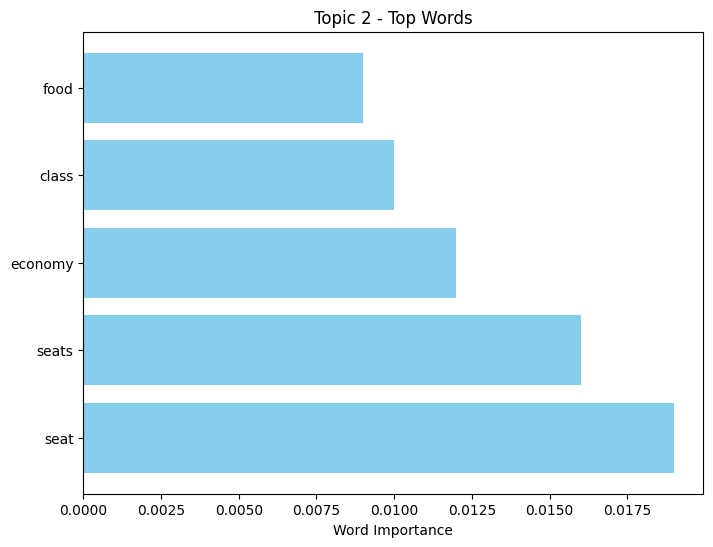

In [ ]:
topics = {
    0: '0.014*"good" + 0.013*"crew" + 0.012*"food" + 0.012*"service" + 0.010*"cabin"',
    1: '0.008*"told" + 0.008*"service" + 0.007*"hours" + 0.007*"get" + 0.007*"staff"',
    2: '0.019*"seat" + 0.016*"seats" + 0.012*"economy" + 0.010*"class" + 0.009*"food"'
}

# Extract top words for each topic
topic_words = {key: [word.split('"')[1] for word in value.split('+')] for key, value in topics.items()}

# Plotting the bar chart for each topic
for topic, words in topic_words.items():
    plt.figure(figsize=(8, 6))
    plt.barh(words, width=[float(word.split('*')[0]) for word in topics[topic].split('+')], color='skyblue')
    plt.xlabel('Word Importance')
    plt.title(f'Topic {topic} - Top Words')
    plt.show()

In [ ]:
len(d)

3728